## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |
|Rodolfo Simões        |2215080073 |

### Explorando a base de dados: Hábitos de estudantes e performance acadêmica.

Este conjunto de dados sintéticos simula os comportamentos acadêmicos e de estilo de vida de 80.000 estudantes, incluindo diversas características como hábitos de estudo, saúde mental, histórico familiar, motivação e fatores ambientais. O objetivo é explorar como diferentes variáveis ​​afetam o desempenho dos alunos em termos de GPA e notas em exames.

O conjunto de dados foi gerado sinteticamente usando Python com modelagem estatística realista, distribuições gaussianas, lógica condicional e heurística para simular o comportamento real dos alunos e os resultados acadêmicos.

**ISENÇÃO DE RESPONSABILIDADE**: Este é um conjunto de dados sintético destinado apenas a fins educacionais e de pesquisa. Não contém dados reais de alunos.

Link da base dados utilizada: https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset/data

In [42]:
# Reservado para importação das bibliotecas:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Verificando as informações do Dataset:

In [43]:
# Abrindo a base de dados:
df = pd.read_csv("enhanced_student_habits_performance_dataset.csv")

In [44]:
# Visualizando os 10 primeiros exemplos:
df.head(10)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84
8,100008,28,Female,Psychology,0.600000,0.3,2.6,Yes,64.2,7.6,...,4.8,Library,No,Low,4,4,10,Kinesthetic,5.8,70
9,100009,19,Male,Engineering,5.200000,1.1,1.6,Yes,40.1,7.2,...,8.0,Cafe,Yes,Medium,7,9,6,Auditory,7.0,100


In [45]:
# Quantidade de exemplos:
df.shape

(80000, 31)

In [46]:
# Visualizando os atributos e quais seus tipos:
df.info(memory_usage = False, show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   student_id                     int64  
 1   age                            int64  
 2   gender                         object 
 3   major                          object 
 4   study_hours_per_day            float64
 5   social_media_hours             float64
 6   netflix_hours                  float64
 7   part_time_job                  object 
 8   attendance_percentage          float64
 9   sleep_hours                    float64
 10  diet_quality                   object 
 11  exercise_frequency             int64  
 12  parental_education_level       object 
 13  internet_quality               object 
 14  mental_health_rating           float64
 15  extracurricular_participation  object 
 16  previous_gpa                   float64
 17  semester                       int64  
 18  stress

In [47]:
# Verificando quais atributos possuem dados faltantes:
df.isna().sum()

student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_style      

In [48]:
# Verificando se existe dados duplicados:
df.duplicated().sum()

0

### Visualizando o Dataset:

In [49]:
# Separando as colunas de dados numéricos e de dados categóricos
columns_num = df.select_dtypes(include = ['number'])
columns_num = columns_num.drop(columns = ['student_id'])

# columns_num = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 
#                'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', '']

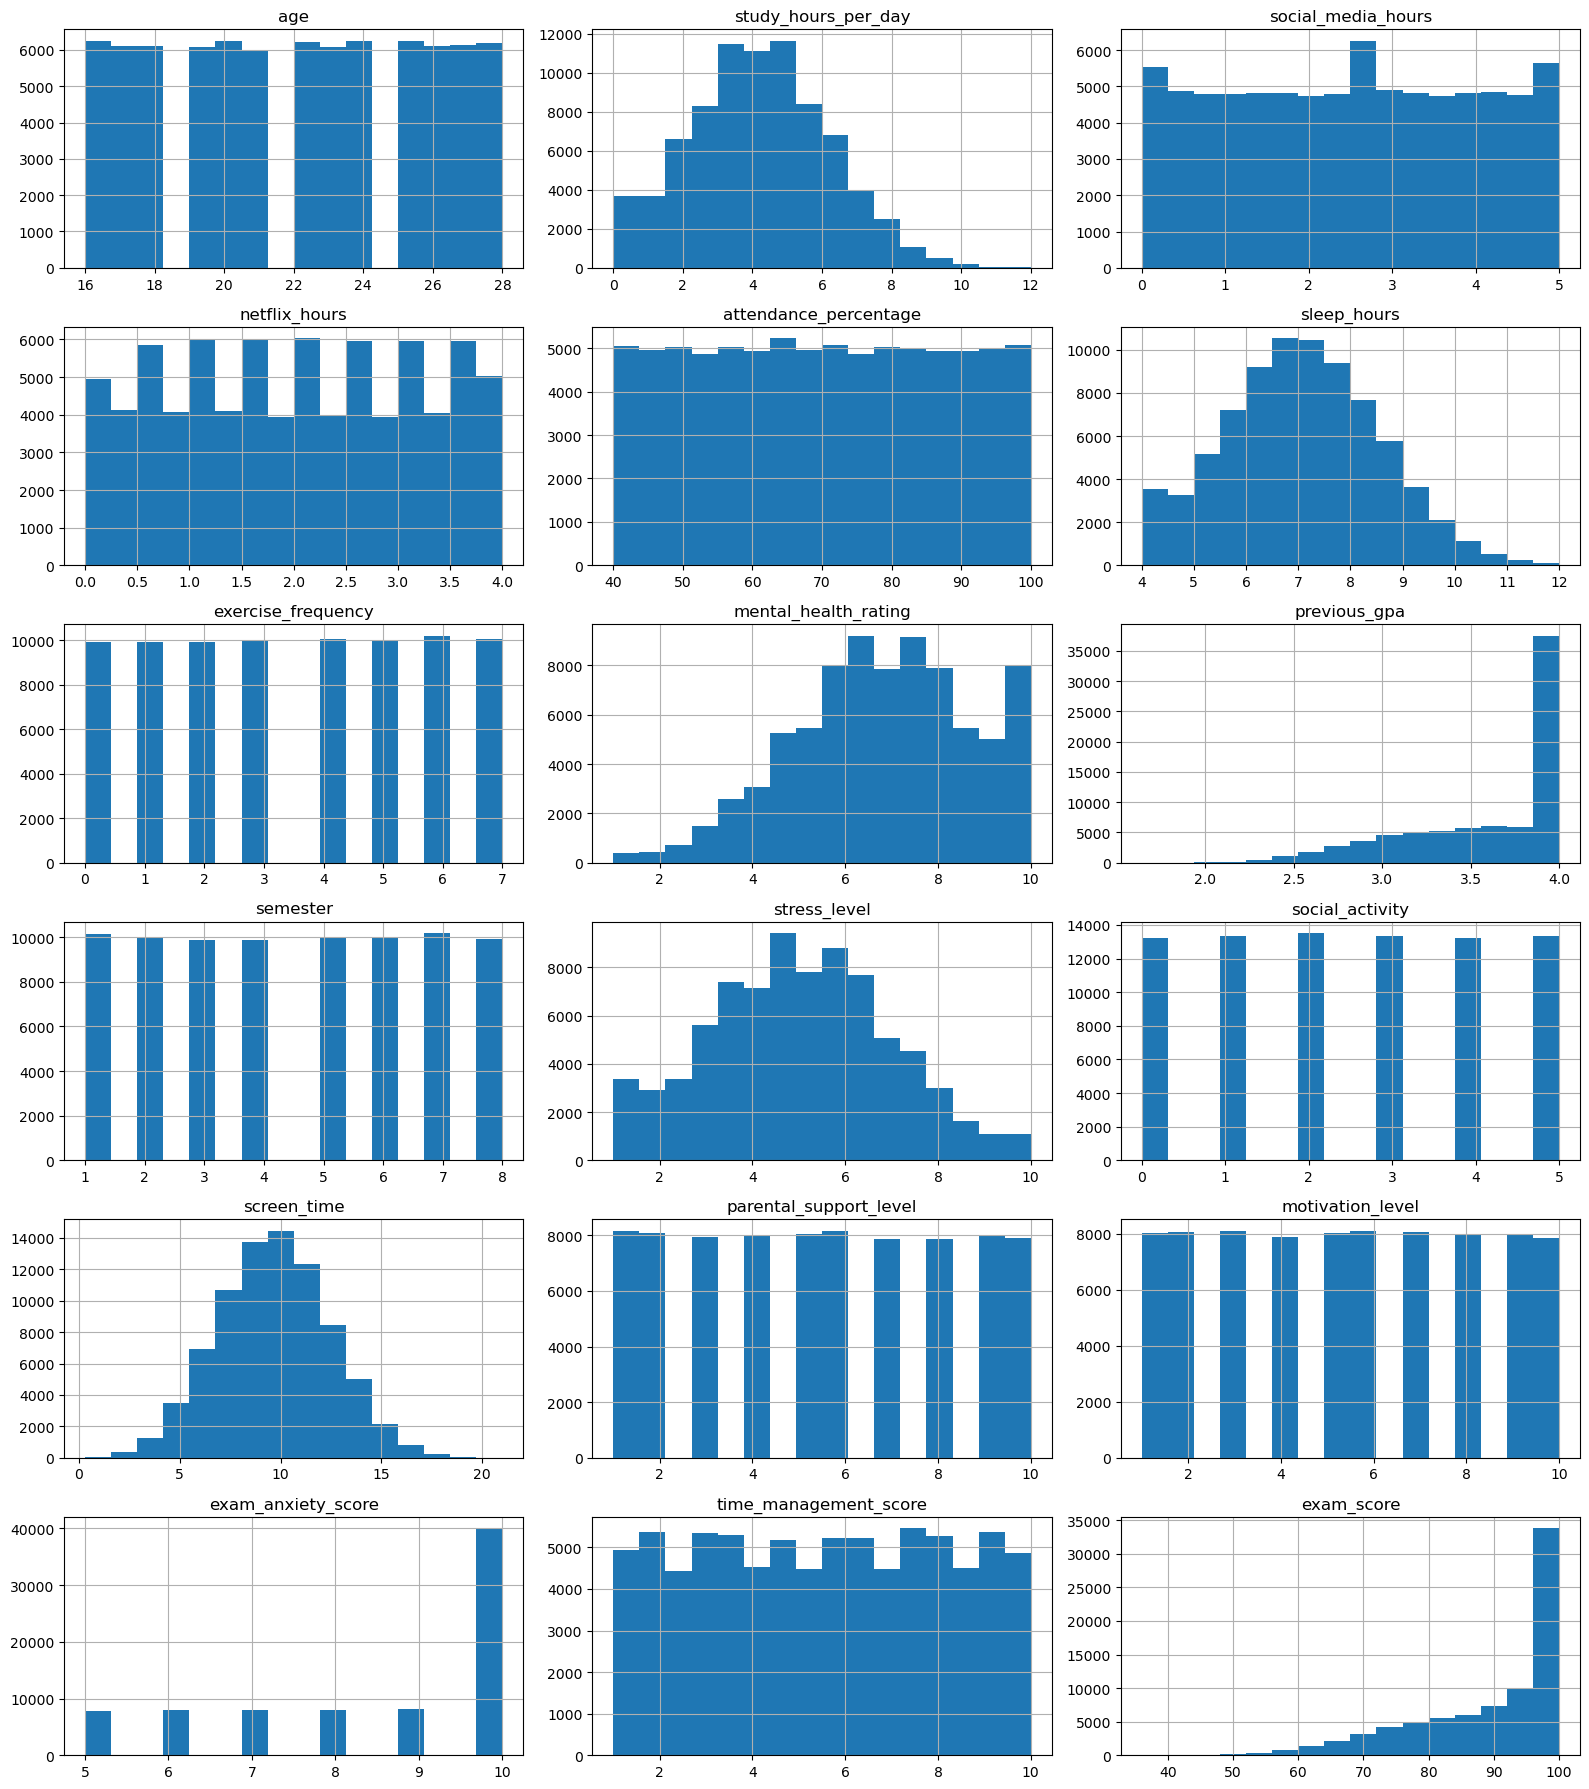

In [50]:


# Supondo que columns_num_plot seja um DataFrame apenas com colunas numéricas
num_cols = columns_num.shape[1]
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Arredonda para cima

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()  # Transforma em uma lista para indexar facilmente

for i, col in enumerate(columns_num.columns):
    columns_num[col].hist(bins = 16, ax = axes[i], figsize = (16, 18))
    axes[i].set_title(col)
    axes[i].grid(True)

# Esconder os eixos extras, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


COMENTAR SOBRE OS GRÀFICOS

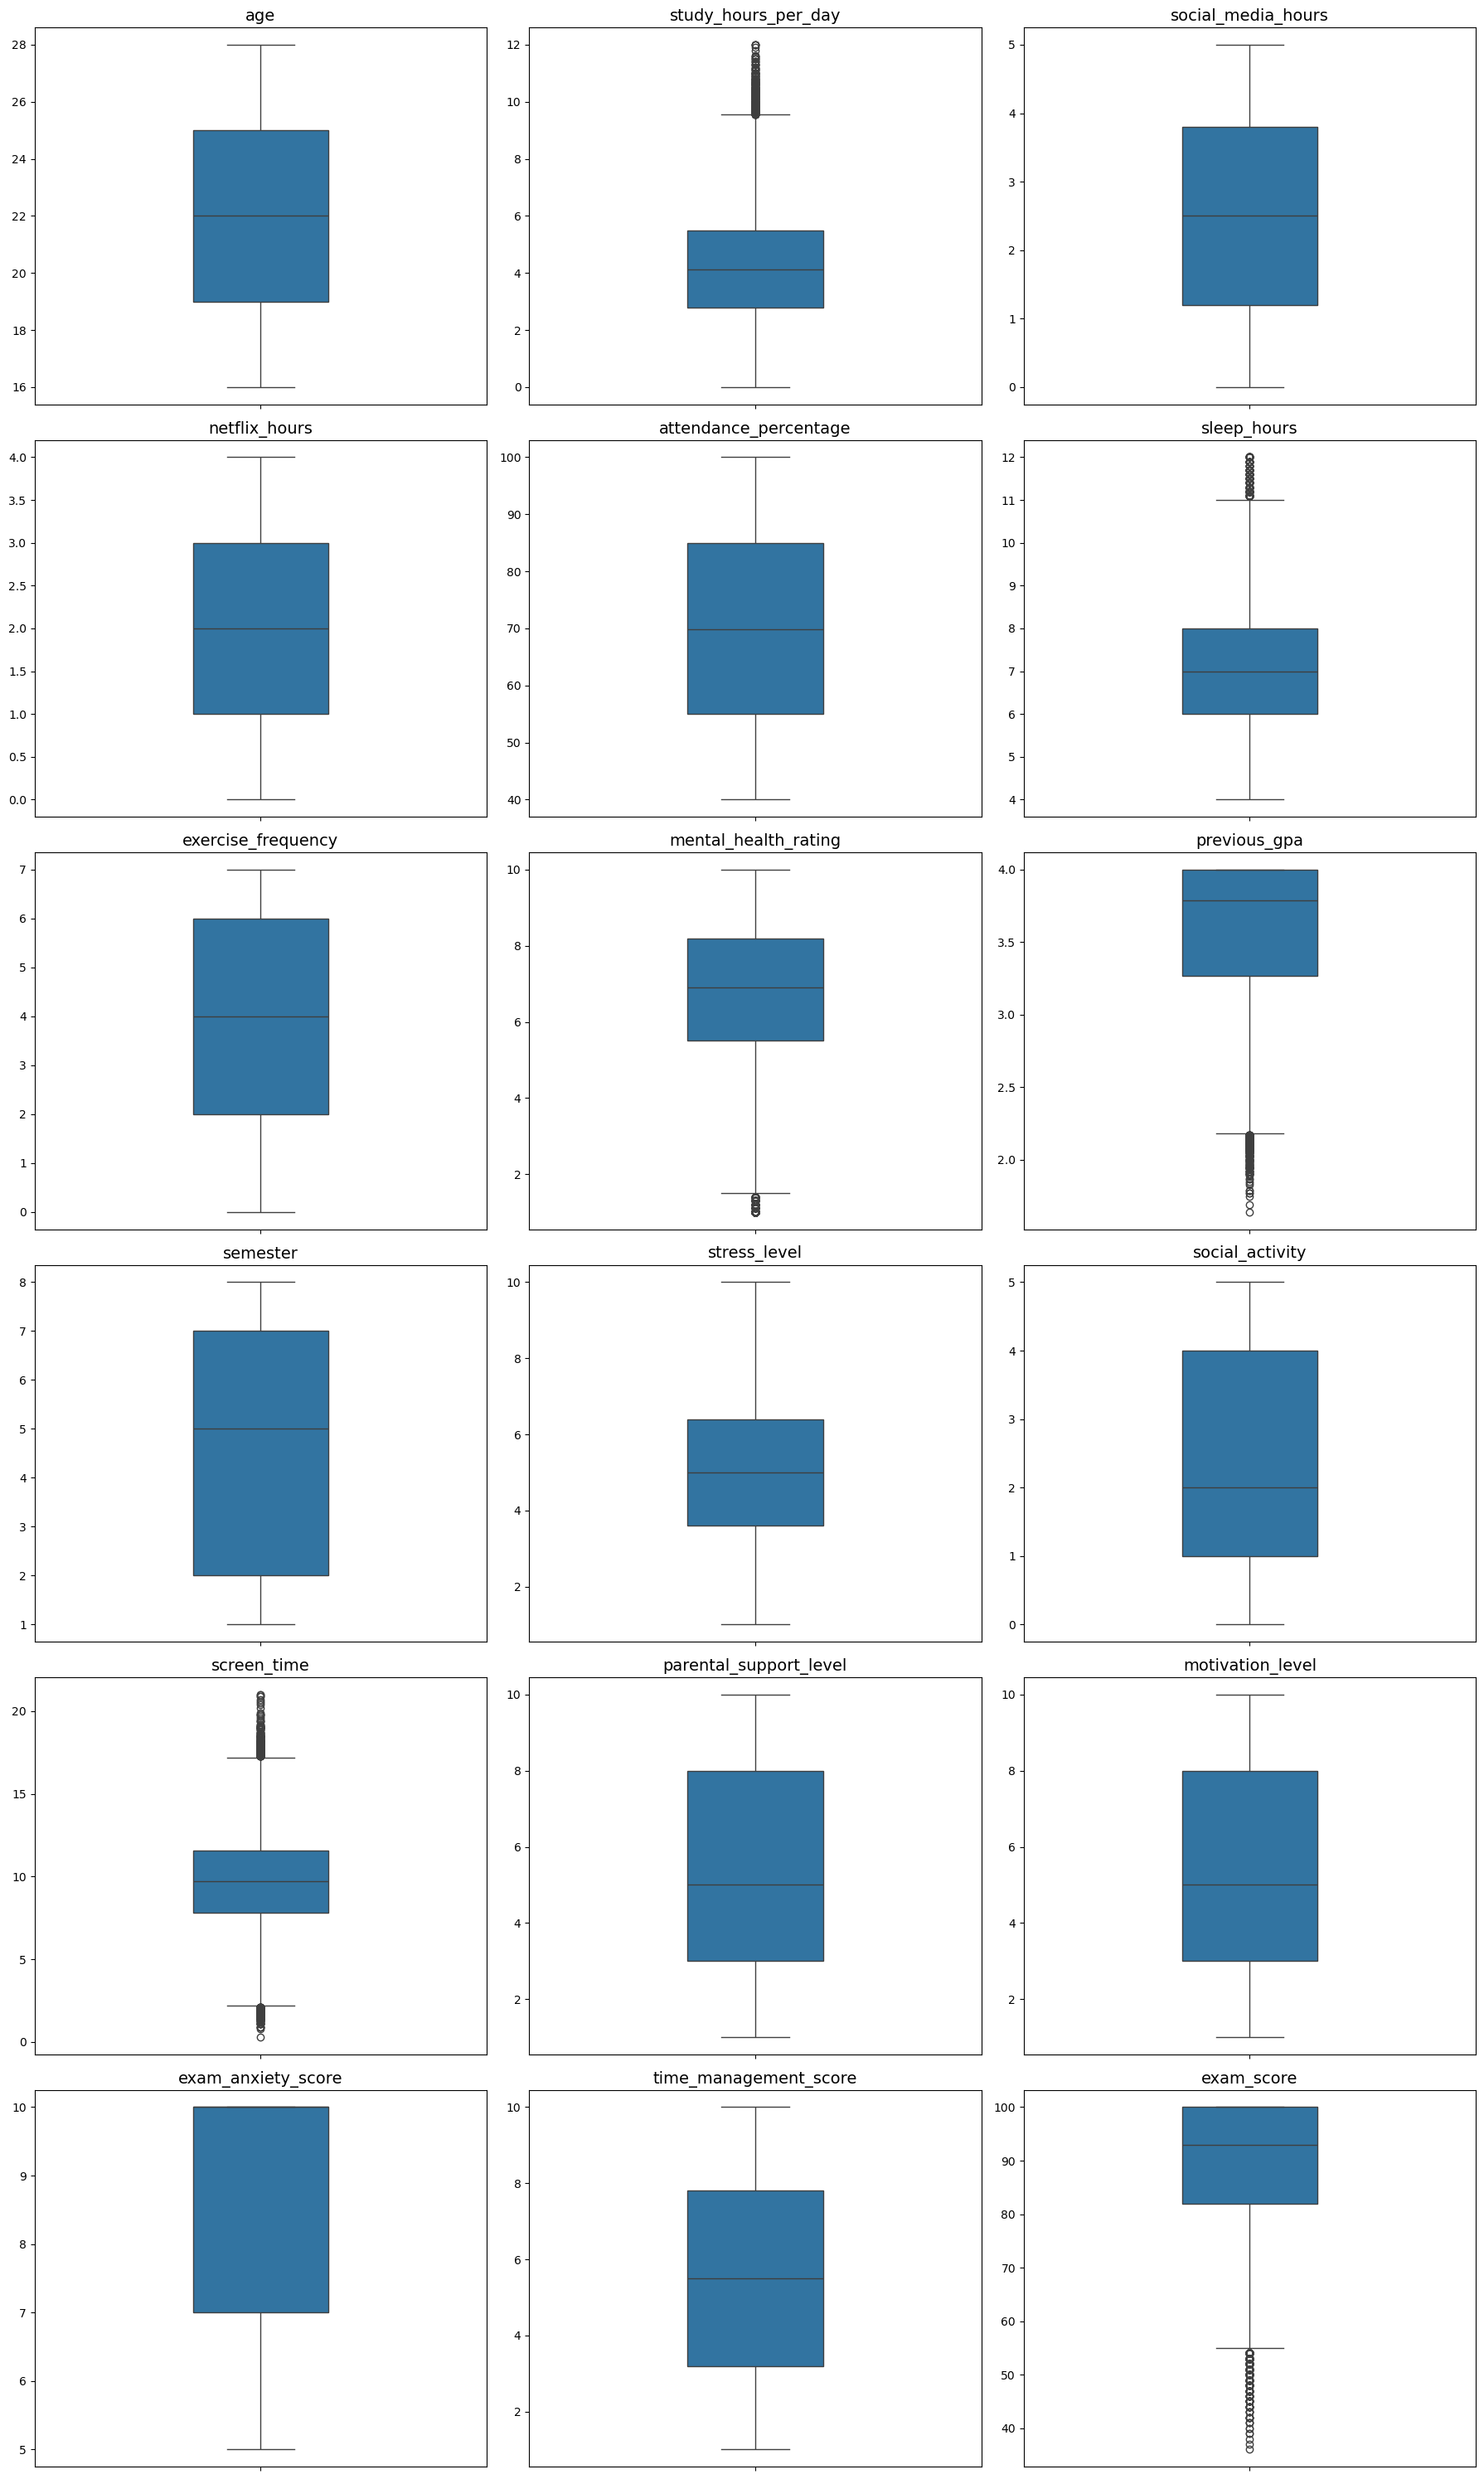

In [51]:
# Lista de colunas numéricas a serem plotadas
colunas = columns_num.columns

# Definindo layout da grade
cols_por_linha = 3
total_plots = len(colunas)
linhas = (total_plots + cols_por_linha - 1) // cols_por_linha

# Criando subplots
fig, axes = plt.subplots(nrows=linhas, ncols=cols_por_linha, figsize=(18, 5 * linhas))
axes = axes.flatten()

# Loop de plotagem
for i, col in enumerate(colunas):
    sns.boxplot(y = columns_num[col], ax = axes[i], width = 0.3)
    axes[i].set_title(f'{col}', fontsize = 14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove eixos não usados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

COMENTAR BOXPLOTS

### Transformando atributos categóricos em valores numéricos (One-hot Encoding):

In [52]:
categorical_cols = df.select_dtypes(include = ['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns = categorical_cols)

df_encoded.drop(columns = ['student_id'], inplace = True)

In [53]:
df_encoded

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,...,study_environment_Quiet Room,access_to_tutoring_No,access_to_tutoring_Yes,family_income_range_High,family_income_range_Low,family_income_range_Medium,learning_style_Auditory,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,26,7.645367,3.0,0.1,70.3,6.2,3,6.0,4.00,5,...,False,False,True,True,False,False,False,False,True,False
1,28,5.700000,0.5,0.4,88.4,7.2,4,6.8,4.00,7,...,False,False,True,False,True,False,False,False,True,False
2,17,2.400000,4.2,0.7,82.1,9.2,4,5.7,3.79,4,...,False,False,True,True,False,False,False,True,False,False
3,27,3.400000,4.6,2.3,79.3,4.2,3,8.5,4.00,6,...,False,False,True,False,True,False,False,False,True,False
4,25,4.700000,0.8,2.7,62.9,6.5,6,9.2,4.00,4,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,16,3.700000,2.1,1.0,80.8,6.1,0,1.0,3.40,2,...,False,True,False,False,True,False,True,False,False,False
79996,16,1.200000,0.4,2.9,99.5,4.1,0,5.7,2.26,1,...,False,True,False,False,True,False,False,True,False,False
79997,26,4.100000,1.6,1.6,46.1,8.3,7,6.7,3.15,3,...,False,True,False,False,False,True,False,False,False,True
79998,23,3.800000,0.6,3.5,58.7,5.8,2,7.6,3.67,6,...,True,False,True,False,True,False,False,True,False,False


### Normalização Min-Max:

In [54]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(columns_num), columns = columns_num.columns)

df_final = pd.concat([df_scaled, df_encoded], axis = 1)

df_final

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,...,study_environment_Quiet Room,access_to_tutoring_No,access_to_tutoring_Yes,family_income_range_High,family_income_range_Low,family_income_range_Medium,learning_style_Auditory,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,0.833333,0.637114,0.60,0.025,0.505000,0.2750,0.428571,0.555556,1.000000,0.571429,...,False,False,True,True,False,False,False,False,True,False
1,1.000000,0.475000,0.10,0.100,0.806667,0.4000,0.571429,0.644444,1.000000,0.857143,...,False,False,True,False,True,False,False,False,True,False
2,0.083333,0.200000,0.84,0.175,0.701667,0.6500,0.571429,0.522222,0.911017,0.428571,...,False,False,True,True,False,False,False,True,False,False
3,0.916667,0.283333,0.92,0.575,0.655000,0.0250,0.428571,0.833333,1.000000,0.714286,...,False,False,True,False,True,False,False,False,True,False
4,0.750000,0.391667,0.16,0.675,0.381667,0.3125,0.857143,0.911111,1.000000,0.428571,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.000000,0.308333,0.42,0.250,0.680000,0.2625,0.000000,0.000000,0.745763,0.142857,...,False,True,False,False,True,False,True,False,False,False
79996,0.000000,0.100000,0.08,0.725,0.991667,0.0125,0.000000,0.522222,0.262712,0.000000,...,False,True,False,False,True,False,False,True,False,False
79997,0.833333,0.341667,0.32,0.400,0.101667,0.5375,1.000000,0.633333,0.639831,0.285714,...,False,True,False,False,False,True,False,False,False,True
79998,0.583333,0.316667,0.12,0.875,0.311667,0.2250,0.285714,0.733333,0.860169,0.714286,...,True,False,True,False,True,False,False,True,False,False


### Exportando Dataset ajustado para o treinamento do modelo:

In [55]:
df_final.to_csv("df_final.csv", index = False)

In [56]:
df_test = pd.read_csv("df_final.csv")
df_test

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,...,study_environment_Quiet Room,access_to_tutoring_No,access_to_tutoring_Yes,family_income_range_High,family_income_range_Low,family_income_range_Medium,learning_style_Auditory,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,0.833333,0.637114,0.60,0.025,0.505000,0.2750,0.428571,0.555556,1.000000,0.571429,...,False,False,True,True,False,False,False,False,True,False
1,1.000000,0.475000,0.10,0.100,0.806667,0.4000,0.571429,0.644444,1.000000,0.857143,...,False,False,True,False,True,False,False,False,True,False
2,0.083333,0.200000,0.84,0.175,0.701667,0.6500,0.571429,0.522222,0.911017,0.428571,...,False,False,True,True,False,False,False,True,False,False
3,0.916667,0.283333,0.92,0.575,0.655000,0.0250,0.428571,0.833333,1.000000,0.714286,...,False,False,True,False,True,False,False,False,True,False
4,0.750000,0.391667,0.16,0.675,0.381667,0.3125,0.857143,0.911111,1.000000,0.428571,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.000000,0.308333,0.42,0.250,0.680000,0.2625,0.000000,0.000000,0.745763,0.142857,...,False,True,False,False,True,False,True,False,False,False
79996,0.000000,0.100000,0.08,0.725,0.991667,0.0125,0.000000,0.522222,0.262712,0.000000,...,False,True,False,False,True,False,False,True,False,False
79997,0.833333,0.341667,0.32,0.400,0.101667,0.5375,1.000000,0.633333,0.639831,0.285714,...,False,True,False,False,False,True,False,False,False,True
79998,0.583333,0.316667,0.12,0.875,0.311667,0.2250,0.285714,0.733333,0.860169,0.714286,...,True,False,True,False,True,False,False,True,False,False
